# Fourier Lens

This notebook contains the problems which are solved with the Diffraction Tool

## Import all the things

Import regular packages

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline

import cv2
import numpy as np
from cmath import pi

Add relative path

In [3]:
import sys
import os
sys.path.append(os.path.join('..','Scripts'))

Import Diffraction Tool

In [4]:
from DiffractionTool import PhaseTypeHologram
from DiffractionTool import PatternGenerator
from DiffractionTool import HelperFunctions as hp

## Problems

As shown in the figure above, a 632.8nm laser beam is incident on a 200 micron diameter phase type hologram.
And the transmitted light forms an image of $500\mu m*500\mu m$ at $z=400\mu m$ (the image content is customized).
Combined with angular spectrum method or Rayleigh-Sommerfeld diffraction, the GS algorithm shall be built to optimize the following two cases of hologram phase distributions. Upload code and report which includes the deserved phase distribution and detailed analysis.
1. Phase distribution when the pixel cell size of the hologram is $0.3\mu m *0.3\mu m$
2. Phase distribution when the pixel cell size of the hologram is $2.0\mu m *2.0\mu m$
3. Compare the differences between the two cases and analyze the reasons

<img src="https://github.com/yesunhuang/Optics_Toolbox_In_Python/blob/6738af360a3f9c9bf34ffd43a9751a1bcbfd55ff/notebooks/imgs/Prob5.png" width="50%">

<img src="imgs/Prob5.png" width="50%">

#### Paramters

In [5]:
N_size=1501
#μm plane [500,500]μm 
interval=0.3
waveLambda=0.6328
z=400
k=2.0*pi/waveLambda
actualSize=N_size*interval
xyInterval=[interval]*2
hologramRadius=100

#### Original Image

In [6]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")
filename='Prob3Data.png'

In [7]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
targetImg=cv2.resize(grayImg,(N_size,N_size))
targetImg=targetImg/np.max(np.abs(targetImg))

In [8]:
PTest=PatternGenerator(N_size,xyInterval,pattern='rect')
targetImg=hp.intensity(PTest.generate([100,100]))

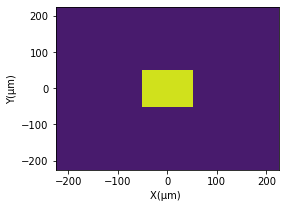

In [9]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

In [10]:
print(targetImg.shape)

(1501, 1501)


### Hologram Pattern

In [11]:
shape=PatternGenerator(N_size,xyInterval,pattern='circle')

In [12]:
hologramShape=shape.generate([hologramRadius])

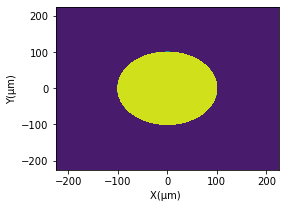

In [13]:
hp.displace_2d(hp.intensity(hologramShape),labels,range);

### Sub problem 1

Phase distribution when the pixel cell size of the hologram is $0.3\mu m *0.3\mu m$.

In [14]:
#parameters
pixelSize=[0.3]*2

In [15]:
hologramP1=PhaseTypeHologram(N_size,xyInterval,pixelSize,hologramShape)

GS

In [16]:
loss=hologramP1.get_hologram(z,k,hologramShape,targetImg,epoches=10)

Epoch [1/10], loss: 0.033879, time: 38.255231s
Epoch [2/10], loss: 0.033572, time: 13.069883s
Epoch [3/10], loss: 0.034532, time: 13.291096s
Epoch [4/10], loss: 0.036705, time: 15.260238s
Epoch [5/10], loss: 0.043243, time: 14.954143s
Epoch [6/10], loss: 0.037855, time: 13.373281s
Epoch [7/10], loss: 0.033933, time: 13.392835s
Epoch [8/10], loss: 0.032150, time: 13.490777s
Epoch [9/10], loss: 0.041006, time: 13.158018s
Epoch [10/10], loss: 0.035895, time: 13.275464s


Results

In [17]:
result=hologramP1.apply_hologram(z,k,hologramShape)

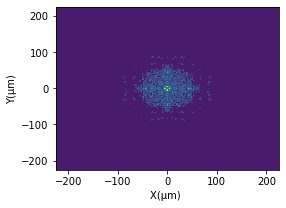

In [18]:
hp.displace_2d(hp.intensity(result),labels,range);

Hologram phase distribution

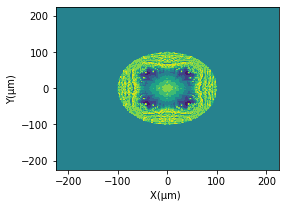

In [19]:
hp.displace_2d(hologramP1.get_hologram_phase_distribution(),labels,range)

### Sub problem 2

Phase distribution when the pixel cell size of the hologram is $2.0\mu m *2.0\mu m$

In [20]:
#parameters
pixelSize=[2.0]*2

In [21]:
hologramP2=PhaseTypeHologram(N_size,xyInterval,pixelSize,hologramShape)

GS

In [22]:
loss=hologramP2.get_hologram(z,k,hologramShape,targetImg,epoches=10)

Epoch [1/10], loss: 0.033879, time: 38.315020s
Epoch [2/10], loss: 0.035728, time: 13.368024s
Epoch [3/10], loss: 0.038161, time: 13.268527s
Epoch [4/10], loss: 0.037167, time: 13.153323s
Epoch [5/10], loss: 0.038041, time: 13.213631s
Epoch [6/10], loss: 0.038240, time: 13.223960s
Epoch [7/10], loss: 0.039331, time: 13.203363s
Epoch [8/10], loss: 0.039533, time: 13.165152s
Epoch [9/10], loss: 0.040830, time: 13.160649s
Epoch [10/10], loss: 0.042667, time: 13.169927s


Results

In [23]:
result=hologramP2.apply_hologram(z,k,hologramShape)

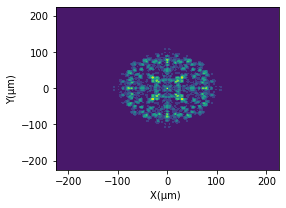

In [24]:
hp.displace_2d(hp.intensity(result),labels,range);

Hologram phase distribution

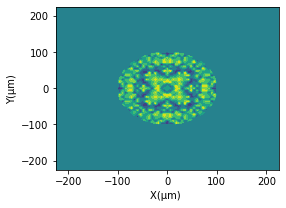

In [25]:
hp.displace_2d(hologramP2.get_hologram_phase_distribution(),labels,range)

### Sub problem 3

Compare the differences between the two cases and analyze the reasons

Answer: When the pixel size is too large, the result image is very rough. The reason is that the GS algorithm is not able to capture the phase distribution of the hologram and does not converge due to the roughness of pixel. So it might be better to use a small pixel size.